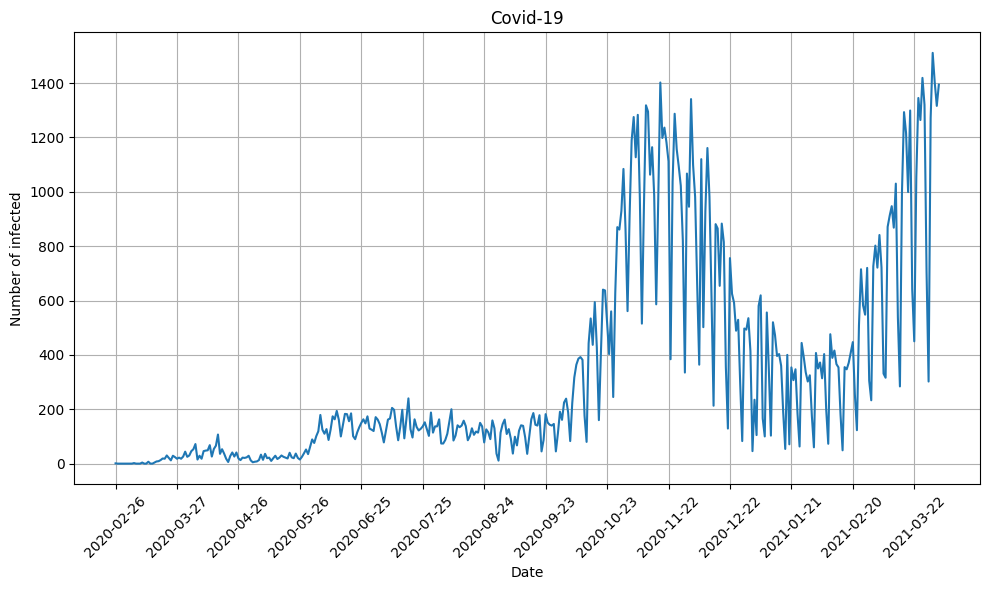

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_excel('MKD-Kovid.xlsx')

plt.figure(figsize=(10, 6))
plt.plot(df['Unnamed: 0'], df['Den'])
plt.ylabel('Number of infected')
plt.xlabel('Date')
plt.xticks(df.index[::30], rotation=45)
plt.title('Covid-19')
plt.grid()
plt.tight_layout()
plt.show()

In [119]:
def weighted_moving_average(df, weight):
    weight_moving_avg = np.zeros_like(df)
    for i in range(len(weight_moving_avg)):
        denominator = 0
        for j in range(weight):
            if i - j >= 0:
                weight_moving_avg[i] += (weight - j) * df[i - j]
                denominator += weight - j
        weight_moving_avg[i] /= denominator
    return weight_moving_avg

In [120]:
def moving_average(df, weight):
    moving_avg = np.zeros_like(df)
    for i in range(len(moving_avg)):
        for j in range(M):
            if i - j >= 0:
                moving_avg[i] += df[i - j]
        moving_avg[i] /= weight
    return moving_avg

In [121]:
def median_filter(df, weight):
    med_fil = np.zeros_like(df)
    for i in range(len(med_fil)):
        if i - weight >= 0:
            med_fil[i] = np.median(df[i - weight:i])
    return med_fil

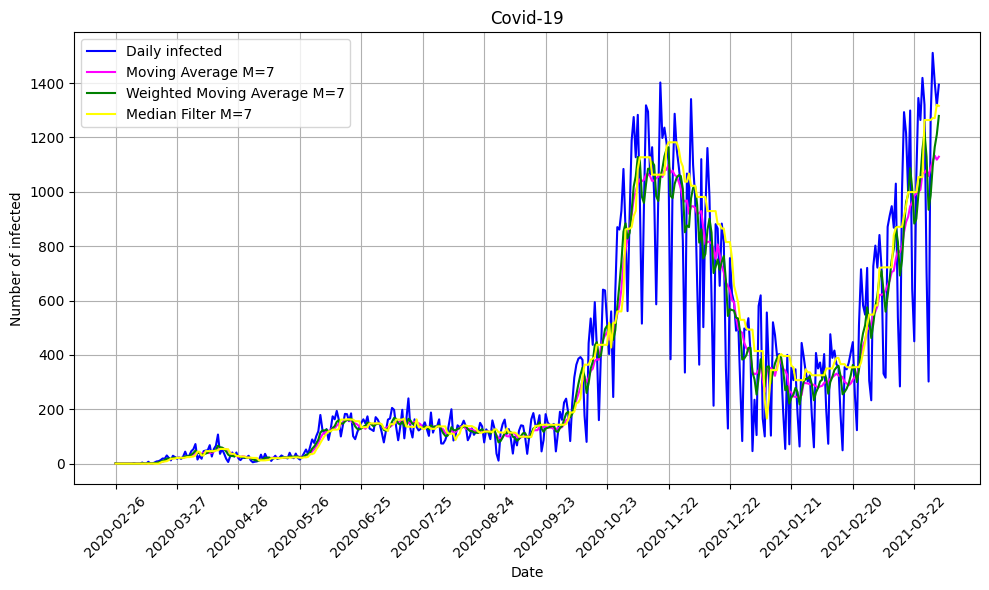

In [122]:
M = 7

plt.figure(figsize=(10, 6))
plt.plot(df['Unnamed: 0'], df['Den'], label='Daily infected', color='blue')
plt.plot(df['Unnamed: 0'], moving_average(df['Den'], M), label=f'Moving Average M={M}', color='magenta')
plt.plot(df['Unnamed: 0'], weighted_moving_average(df['Den'], M), label=f'Weighted Moving Average M={M}', color='green')
plt.plot(df['Unnamed: 0'], median_filter(df['Den'], M), label=f'Median Filter M={M}', color='yellow')
plt.ylabel('Number of infected')
plt.xlabel('Date')
plt.xticks(df.index[::30], rotation=45)
plt.title('Covid-19')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

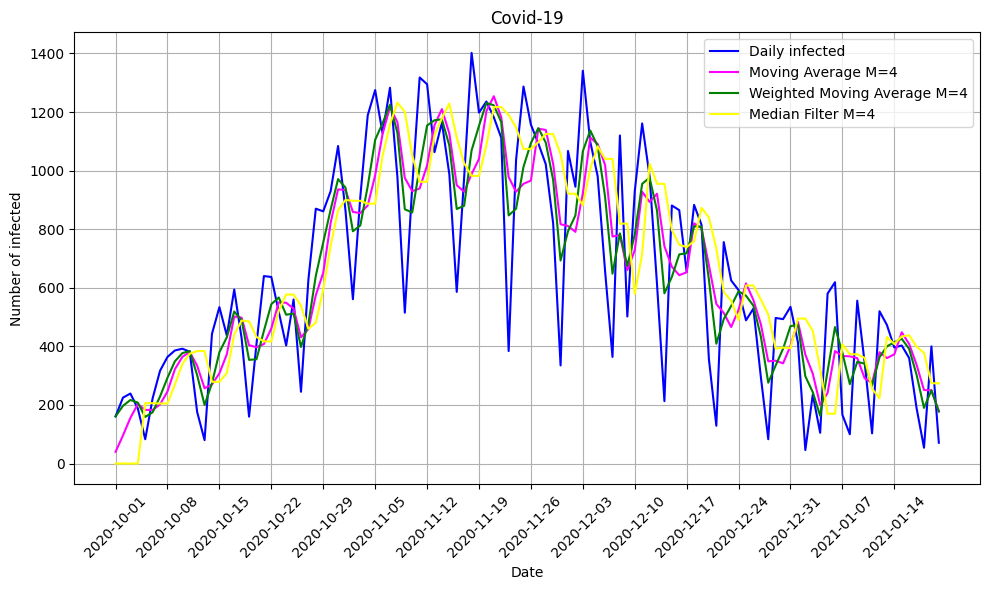

In [123]:
mask = (df['Unnamed: 0'] >= '2020-10-01') & (df['Unnamed: 0'] <= '2021-01-20')
filtered_df = df.loc[mask].copy()
filtered_df.reset_index(drop=True, inplace=True)

M = 4

plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Unnamed: 0'], filtered_df['Den'], label='Daily infected', color='blue')
plt.plot(filtered_df['Unnamed: 0'], moving_average(filtered_df['Den'], M), label=f'Moving Average M={M}', color='magenta')
plt.plot(filtered_df['Unnamed: 0'], weighted_moving_average(filtered_df['Den'], M), label=f'Weighted Moving Average M={M}', color='green')
plt.plot(filtered_df['Unnamed: 0'], median_filter(filtered_df['Den'], M), label=f'Median Filter M={M}', color='yellow')
plt.ylabel('Number of infected')
plt.xlabel('Date')
plt.xticks(filtered_df.index[::7], rotation=45)
plt.title('Covid-19')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()